Project Title: Predicting Flight Prices Based on Various Criteria

Team Members: Muntasir Billah, Anita Gjurchinovska, Natalie Lollin, Philip Okoth, Emily Washburn

Project Description/Outline: An overall analysis of flight prices will be conducted, followed by a deeper look at the relationship between flight price and several other variables (including date of flight, starting airport, destination airport, duration of flight, etc.).  Based on these findings, further analysis of prices within each of these categories will be conducted as needed. 

# Research Questions to Answer: 
Which variable/s has/have the strongest association with flight price?
Which variable/s has/have the weakest association with flight price?
Can flight price be predicted based on any of these variables?
Which airports are most expensive to fly to/from?
Is it cheaper to fly in the am/pm? Hypothesis testing.
What day is cheapest to fly on?

Datasets to Be Used: https://www.kaggle.com/datasets/dilwong/flightprices 
This dataset is a CSV file where each row is a purchasable ticket found on Expedia between 2022-04-16 and 2022-10-05, to/from the following airports: ATL, DFW, DEN, ORD, LAX, CLT, MIA, JFK, EWR, SFO, DTW, BOS, PHL, LGA, IAD, OAK.
Since the dataset is huge we will only consider one month in our analysis.

# Rough Breakdown of Tasks: 

* Convert csv to dataframe and clean the dataframe.
* Find overall summary statistics for flight price.
* Find summary statistics when grouped by each variable.
* Create data displays; these should include:
* Histogram and/or box plot of all flight prices
* Bar graphs/histograms of the other variables (bar graphs for those that are qualitative, histograms and/or box plots for those that are quantitative)
* Parallel box plots comparing flight prices between departing airports
* Parallel box plots comparing flight prices between arriving airports
* Parallel box plots comparing flight prices comparing flight prices at different times of day (categorize morning, afternoon, night)
* Perform a regression analysis on flight price and any of the quantitative variables:
* Should include: scatter plot, regression equation & r-squared value
* Compare flight price to flight duration (time)
* Compare flight price to travel distance
* Compare flight price to exact time of day

# Written analysis


In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress



In [3]:
# Reference the file where the CSV is located
file = "final itineraries.csv"

# Import the data into a Pandas DataFrame
original_df = pd.read_csv(file)
original_df.head()

,searchDate,flightDate,startingAirport,destinationAirport,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,departureTime,segmentsArrivalTimeRaw,arrivalTime,segmentsAirlineName,segmentsDurationInSeconds,segmentsCabinCode
0,4/16/2022,4/17/2022,ATL,BOS,True,217.67,248.6,9,947.0,2022-04-17T12:57:00.000-04:00,4/17/2022 12:57,2022-04-17T15:26:00.000-04:00,4/17/2022 15:26,Delta,8940,coach
1,4/16/2022,4/17/2022,ATL,BOS,True,217.67,248.6,4,947.0,2022-04-17T06:30:00.000-04:00,4/17/2022 6:30,2022-04-17T09:00:00.000-04:00,4/17/2022 9:00,Delta,9000,coach
2,4/16/2022,4/17/2022,ATL,BOS,True,217.67,248.6,9,947.0,2022-04-17T11:35:00.000-04:00,4/17/2022 11:35,2022-04-17T14:05:00.000-04:00,4/17/2022 14:05,Delta,9000,coach
3,4/16/2022,4/17/2022,ATL,BOS,True,217.67,248.6,8,947.0,2022-04-17T13:59:00.000-04:00,4/17/2022 13:59,2022-04-17T16:31:00.000-04:00,4/17/2022 16:31,Delta,9120,coach
4,4/16/2022,4/17/2022,ATL,BOS,True,217.67,248.6,9,947.0,2022-04-17T09:59:00.000-04:00,4/17/2022 9:59,2022-04-17T12:33:00.000-04:00,4/17/2022 12:33,Delta,9240,coach


In [4]:
# Drop all rows with missing information
clean_df = original_df.dropna(how='any')
clean_df.count()


searchDate                   289025
flightDate                   289025
startingAirport              289025
destinationAirport           289025
isNonStop                    289025
baseFare                     289025
totalFare                    289025
seatsRemaining               289025
totalTravelDistance          289025
segmentsDepartureTimeRaw     289025
departureTime                289025
segmentsArrivalTimeRaw       289025
arrivalTime                  289025
segmentsAirlineName          289025
segmentsDurationInSeconds    289025
segmentsCabinCode            289025
dtype: int64

In [5]:
# Delete columns

clean_df = clean_df.drop(columns= ["isNonStop", "segmentsDepartureTimeRaw", "segmentsArrivalTimeRaw"], axis=1)
clean_df.head()

,searchDate,flightDate,startingAirport,destinationAirport,baseFare,totalFare,seatsRemaining,totalTravelDistance,departureTime,arrivalTime,segmentsAirlineName,segmentsDurationInSeconds,segmentsCabinCode
0,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,9,947.0,4/17/2022 12:57,4/17/2022 15:26,Delta,8940,coach
1,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,4,947.0,4/17/2022 6:30,4/17/2022 9:00,Delta,9000,coach
2,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,9,947.0,4/17/2022 11:35,4/17/2022 14:05,Delta,9000,coach
3,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,8,947.0,4/17/2022 13:59,4/17/2022 16:31,Delta,9120,coach
4,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,9,947.0,4/17/2022 9:59,4/17/2022 12:33,Delta,9240,coach


In [6]:
# Rename our columns
clean_df = clean_df.rename(columns={'searchDate' : 'Search Date', 'flightDate' : 'Flight Date', 'startingAirport' : 'Departure Airport', 
                                    'destinationAirport' : 'Arrival Airport', "baseFare": "Base Cost", "totalFare" : "Total Cost",
	                                "seatsRemaining" : "Remaining Seats", "totalTravelDistance" : "Total Travel Distance", "departureTime" : "Departure Time", 
	                                "arrivalTime" : "Arrival Time", "segmentsAirlineName": "Airline", "segmentsDurationInSeconds": "Length of Flight (seconds)", 
                                    "segmentsCabinCode" : "Cabin Type"
                                    })
clean_df.head()



,Search Date,Flight Date,Departure Airport,Arrival Airport,Base Cost,Total Cost,Remaining Seats,Total Travel Distance,Departure Time,Arrival Time,Airline,Length of Flight (seconds),Cabin Type
0,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,9,947.0,4/17/2022 12:57,4/17/2022 15:26,Delta,8940,coach
1,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,4,947.0,4/17/2022 6:30,4/17/2022 9:00,Delta,9000,coach
2,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,9,947.0,4/17/2022 11:35,4/17/2022 14:05,Delta,9000,coach
3,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,8,947.0,4/17/2022 13:59,4/17/2022 16:31,Delta,9120,coach
4,4/16/2022,4/17/2022,ATL,BOS,217.67,248.6,9,947.0,4/17/2022 9:59,4/17/2022 12:33,Delta,9240,coach


In [6]:
clean_df.dtypes

Search Date                    object
Flight Date                    object
Departure Airport              object
Arrival Airport                object
Base Cost                     float64
Total Cost                    float64
Remaining Seats                 int64
Total Travel Distance         float64
Departure Time                 object
Arrival Time                   object
Airline                        object
Length of Flight (seconds)      int64
Cabin Type                     object
dtype: object

In [72]:
clean_df["Search Date"] = pd.to_datetime(clean_df["Search Date"], errors='coerce')
clean_df["Flight Date"] = pd.to_datetime(clean_df["Flight Date"], errors='coerce')
clean_df["Departure Time"] = pd.to_datetime(clean_df["Departure Time"], errors='coerce')

clean_df.dtypes

Search Date                   datetime64[ns]
Flight Date                   datetime64[ns]
Departure Airport                     object
Arrival Airport                       object
Base Cost                            float64
Total Cost                           float64
Remaining Seats                        int64
Total Travel Distance                float64
Departure Time                datetime64[ns]
Arrival Time                          object
Airline                               object
Length of Flight (seconds)             int64
Cabin Type                            object
Date Difference                      float64
Length of Flight (mins)              float64
dtype: object

In [74]:
# Convert dates to date format and compute the number of days between booking and flight day.
clean_df['Date Difference'] = (clean_df['Flight Date'] - clean_df['Search Date']).dt.days

#Convert length of flight from seconds to minutes.

clean_df['Length of Flight (mins)'] = clean_df['Length of Flight (seconds)']/60

# Column classifying departure time as either asm/pm

clean_df.head()

,Search Date,Flight Date,Departure Airport,Arrival Airport,Base Cost,Total Cost,Remaining Seats,Total Travel Distance,Departure Time,Arrival Time,Airline,Length of Flight (seconds),Cabin Type,Date Difference,Length of Flight (mins)
0,2022-04-16,2022-04-17,ATL,BOS,217.67,248.6,9,947.0,2022-04-17 12:57:00,4/17/2022 15:26,Delta,8940,coach,1.0,149.0
1,2022-04-16,2022-04-17,ATL,BOS,217.67,248.6,4,947.0,2022-04-17 06:30:00,4/17/2022 9:00,Delta,9000,coach,1.0,150.0
2,2022-04-16,2022-04-17,ATL,BOS,217.67,248.6,9,947.0,2022-04-17 11:35:00,4/17/2022 14:05,Delta,9000,coach,1.0,150.0
3,2022-04-16,2022-04-17,ATL,BOS,217.67,248.6,8,947.0,2022-04-17 13:59:00,4/17/2022 16:31,Delta,9120,coach,1.0,152.0
4,2022-04-16,2022-04-17,ATL,BOS,217.67,248.6,9,947.0,2022-04-17 09:59:00,4/17/2022 12:33,Delta,9240,coach,1.0,154.0


In [9]:
clean_df.dtypes

Search Date                   datetime64[ns]
Flight Date                   datetime64[ns]
Departure Airport                     object
Arrival Airport                       object
Base Cost                            float64
Total Cost                           float64
Remaining Seats                        int64
Total Travel Distance                float64
Departure Time                        object
Arrival Time                          object
Airline                               object
Length of Flight (seconds)             int64
Cabin Type                            object
Date Difference                      float64
dtype: object

In [9]:
# Get only the cabin type to coach
clean_df = clean_df.loc[clean_df['Cabin Type'] == 'coach']
clean_df.count()

Search Date                   287772
Flight Date                   287773
Departure Airport             287773
Arrival Airport               287773
Base Cost                     287773
Total Cost                    287773
Remaining Seats               287773
Total Travel Distance         287773
Departure Time                287773
Arrival Time                  287773
Airline                       287773
Length of Flight (seconds)    287773
Cabin Type                    287773
Date Difference               287772
dtype: int64

In [36]:
# Summary statistics
clean_df.describe()

,Base Cost,Total Cost,Remaining Seats,Total Travel Distance,Length of Flight (seconds),Date Difference,Length of Flight (mins)
count,287773.000000,287773.000000,287773.000000,287773.000000,287773.000000,287772.000000,287773.000000
mean,218.681547,249.590015,6.588665,1087.753267,10962.237249,26.529176,182.703954
std,137.971607,148.326630,2.328760,721.992994,5189.988615,16.584023,86.499810
min,8.720000,23.970000,1.000000,97.000000,2760.000000,1.000000,46.000000
25%,124.650000,148.600000,6.000000,545.000000,7200.000000,11.000000,120.000000
50%,189.770000,217.600000,7.000000,862.000000,9480.000000,26.000000,158.000000
75%,283.720000,319.600000,9.000000,1380.000000,13500.000000,40.000000,225.000000
max,2013.950000,2179.600000,10.000000,2698.000000,26100.000000,60.000000,435.000000


In [11]:
# Summary statistics grouped by departure airport
airline_cost_stats = clean_df.groupby("Airline").agg({"Total Cost": ['min', 'mean', 'median', 'max','var', 'std', 'sem']})
airline_cost_stats


Total Cost                                             \
                         min        mean  median      max           var   
Airline                                                                   
Alaska Airlines        43.60  268.171497  258.60  1162.60  19796.113913   
American Airlines      68.60  254.692735  222.60  2179.60  19921.626825   
Delta                  38.61  248.791907  218.60  1033.60  20093.345788   
Frontier Airlines      23.97  122.450623  111.98   408.99   6110.127057   
JetBlue Airways        38.61  220.112309  188.60  1665.60  23438.677187   
United                 38.61  274.419706  244.60  1528.60  25154.237646   

                                         
                          std       sem  
Airline                                  
Alaska Airlines    140.698664  1.740872  
American Airlines  141.143993  0.446441  
Delta              141.750999  0.550088  
Frontier Airlines   78.167302  1.037355  
JetBlue Airways    153.096954  0.704030  
United             158.600875  0.637373

In [12]:
# Summary statistics grouped by departure airport
departure_cost_stats = clean_df.groupby("Departure Airport").agg({"Total Cost": ['mean', 'median', 'var', 'std', 'sem']})
departure_cost_stats


Total Cost                                            
                         mean  median           var         std       sem
Departure Airport                                                        
ATL                264.412053  233.60  20198.985594  142.123135  0.947867
BOS                205.159906  168.61  19036.445291  137.972625  0.846139
CLT                237.739045  207.11  15468.487676  124.372375  0.928669
DEN                275.408360  254.61  18238.316643  135.049312  1.113035
DFW                258.926269  248.60  13086.630389  114.396811  0.788831
DTW                250.261717  219.60  15598.125760  124.892457  1.087338
EWR                222.596157  197.60  18283.932552  135.218093  0.974205
IAD                263.836020  228.60  23971.224724  154.826434  1.668373
JFK                232.264218  198.60  18713.439878  136.797076  0.937825
LAX                338.556542  323.60  30245.905321  173.913500  1.111433
LGA                162.408784  144.60   5744.372233   75.791637  0.481345
MIA                243.557025  198.60  26184.683455  161.816821  1.186690
OAK                135.195024  133.60   3389.390542   58.218473  2.840771
ORD                230.046320  202.60  13124.352674  114.561567  0.699574
PHL                242.652274  208.61  18324.068224  135.366422  1.347881
SFO                362.852140  343.60  43634.303163  208.888255  1.580357

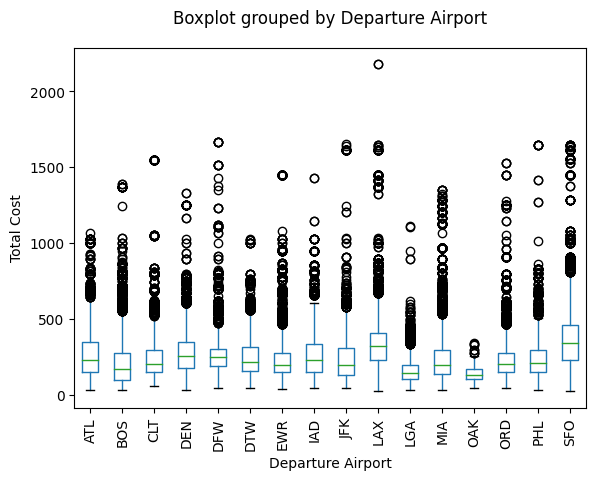

In [13]:
# Generate a box plot that shows the distrubution of the cost for departure airport.
clean_df.boxplot(column = "Total Cost", by = "Departure Airport", grid = False)
plt.xticks(rotation=90)
plt.title(" ")
plt.ylabel("Total Cost")
plt.show()


In [14]:
# Summary statistics grouped by arrival airport
arrival_cost_stats = clean_df.groupby("Arrival Airport").agg({"Total Cost": ['mean', 'median', 'var', 'std', 'sem']})
arrival_cost_stats



Total Cost                                            
                       mean  median           var         std       sem
Arrival Airport                                                        
ATL              234.260690  198.60  16586.413006  128.788249  0.857769
BOS              240.139529  188.60  29892.824099  172.895414  1.064239
CLT              236.444030  198.60  17492.340035  132.258610  0.989959
DEN              253.305785  238.60  13812.647630  117.527221  0.965318
DFW              227.926411  208.61   9499.619284   97.465990  0.674638
DTW              255.397951  219.60  16921.865864  130.084072  1.132279
EWR              266.534266  228.60  31185.839721  176.595129  1.281324
IAD              276.758588  238.60  26855.763402  163.877282  1.770224
JFK              277.031056  250.60  31697.778162  178.038698  1.236290
LAX              300.344880  286.61  20583.620884  143.469930  0.903453
LGA              188.231353  166.61  12482.257098  111.724022  0.709305
MIA              191.762929  183.60  10427.153079  102.113432  0.742805
OAK              172.522151  168.61   4674.985580   68.373866  3.324451
ORD              230.504239  196.60  13667.378975  116.907566  0.713927
PHL              260.734093  238.60  22335.791096  149.451635  1.491611
SFO              351.595517  329.60  37810.703875  194.449746  1.466262

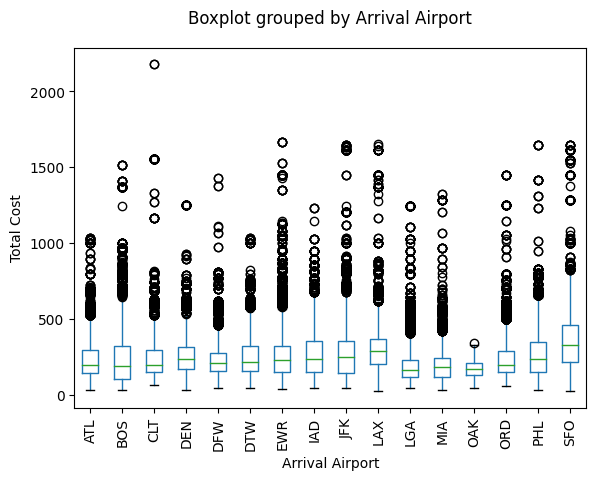

In [15]:
# Generate a box plot that shows the distrubution of the cost for arrival airport.
clean_df.boxplot(column = "Total Cost", by = "Arrival Airport", grid = False)
plt.xticks(rotation=90)
plt.title(" ")
plt.ylabel("Total Cost")
plt.show()


In [16]:
# Summary statistics grouped by airline
airline_cost_stats = clean_df.groupby("Airline").agg({"Total Cost": ['mean', 'median', 'var', 'std', 'sem']})
airline_cost_stats


Total Cost                                            
                         mean  median           var         std       sem
Airline                                                                  
Alaska Airlines    268.171497  258.60  19796.113913  140.698664  1.740872
American Airlines  254.692735  222.60  19921.626825  141.143993  0.446441
Delta              248.791907  218.60  20093.345788  141.750999  0.550088
Frontier Airlines  122.450623  111.98   6110.127057   78.167302  1.037355
JetBlue Airways    220.112309  188.60  23438.677187  153.096954  0.704030
United             274.419706  244.60  25154.237646  158.600875  0.637373

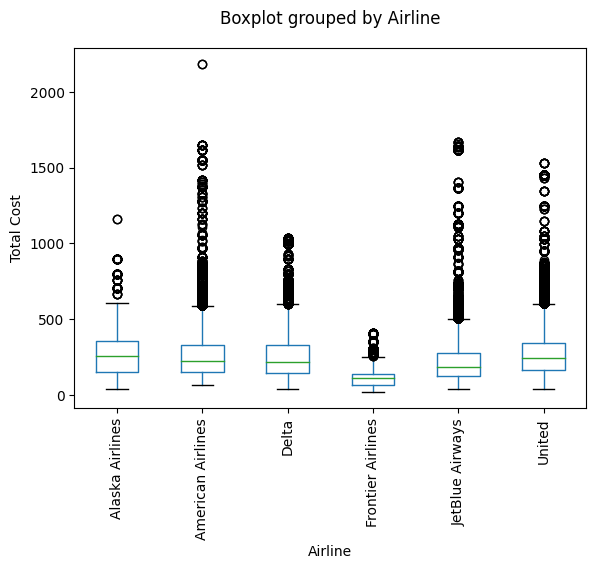

In [17]:
# Generate a box plot that shows the distrubution of the cost for each airline.
clean_df.boxplot(column = "Total Cost", by = "Airline", grid = False)
plt.xticks(rotation=90)
plt.title(" ")
plt.ylabel("Total Cost")
plt.show()


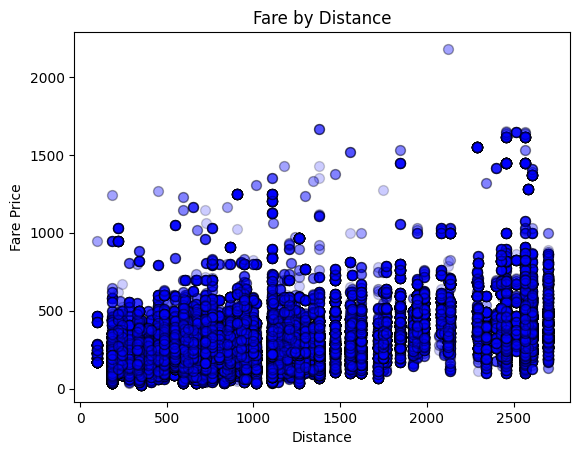

In [37]:
#Scatter plot of Distance vs. Fare prices:
y_values = clean_df['Total Cost']
x_values = clean_df['Total Travel Distance']
plt.scatter(x_values,y_values, c ="blue", linewidths = 1, marker ="o", edgecolor ="black", s = 50, alpha=0.2)
plt.title('Fare by Distance')
plt.ylabel('Fare Price')
plt.xlabel('Distance')
plt.show()


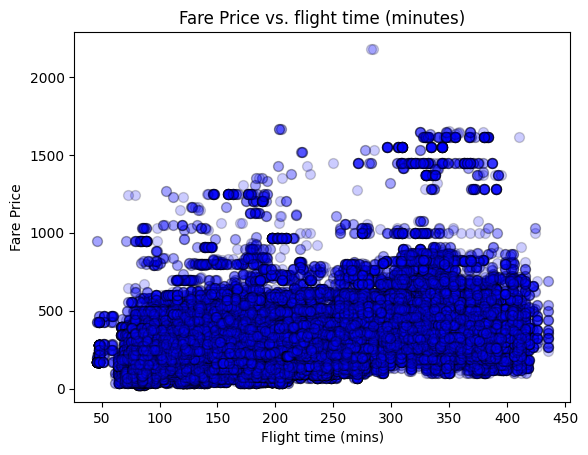

In [43]:

#Scatter plot of flight length vs time:
y_price = clean_df['Total Cost']
x_time = clean_df['Length of Flight (mins)']
plt.scatter(x_time,y_price, c ="b", linewidths = 1, marker ="o", edgecolor ="black", s = 50, alpha=0.2)
plt.title('Fare Price vs. flight time (minutes)')
plt.ylabel('Fare Price')
plt.xlabel('Flight time (mins)')
plt.show()

The r-squared is: 0.2642065175476559


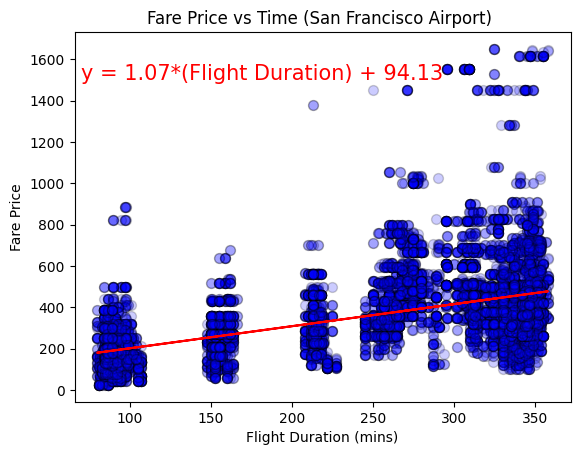

In [48]:
#Scatter plot of variables:
sfo = clean_df.loc[clean_df['Departure Airport']=='SFO']
y_price = sfo['Total Cost']
x_time = sfo['Length of Flight (mins)']
plt.scatter(x_time, y_price, c ="blue", linewidths = 1, marker ="o", edgecolor ="black", s = 50, alpha=0.2)
plt.title('Fare Price vs Time (San Francisco Airport) ')
plt.ylabel('Fare Price')
plt.xlabel('Flight Duration (mins)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_time, y_price)
regress_values = x_time * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "*(Flight Duration) + " + str(round(intercept,2))
correlation = st.pearsonr(x_time, y_price)
plt.plot(x_time,regress_values,"r-")
plt.annotate(line_eq,(70,1500), fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.010211732692570074


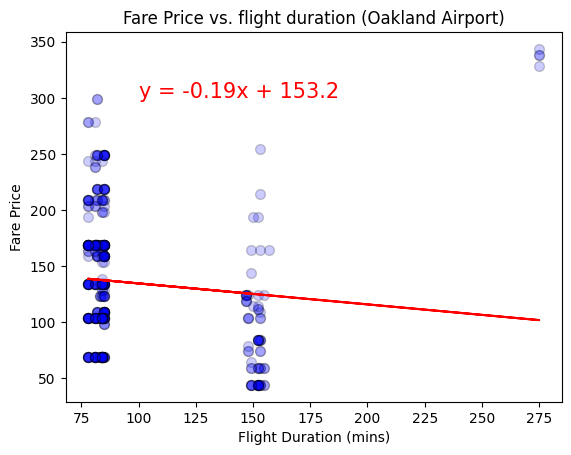

In [51]:
#Scatter plot of variables:
oak = clean_df.loc[clean_df['Departure Airport']=='OAK']
y_oak = oak['Total Cost']
x_oak = oak['Length of Flight (mins)']
plt.scatter(x_oak, y_oak, c ="blue", linewidths = 1, marker ="o", edgecolor ="black", s = 50, alpha=0.2)
plt.title('Fare Price vs. flight duration (Oakland Airport)')
plt.ylabel('Fare Price')
plt.xlabel('Flight Duration (mins)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_oak, y_oak)
regress_values = x_oak * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_oak, y_oak)
plt.plot(x_oak,regress_values,"r-")
plt.annotate(line_eq,(100,300), fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: nan


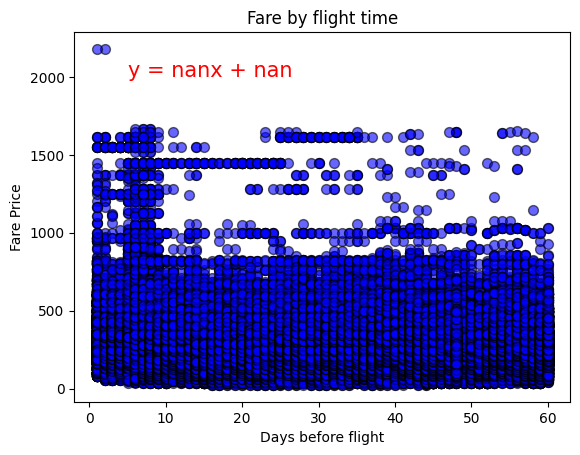

In [54]:
#Scatter plot of fare price vs duration after booking:
y_values = clean_df['Total Cost']
x_values = clean_df['Date Difference']
plt.scatter(x_values, y_values, c ="blue", linewidths = 1, marker ="o", edgecolor ="black", s = 50, alpha=0.6)
plt.title('Fare by flight time')
plt.ylabel('Fare Price')
plt.xlabel('Days before flight')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#correlation = st.pearsonr(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,2000), fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

In [61]:
clean_df['Airline'].unique()

array(['Delta', 'JetBlue Airways', 'American Airlines',
       'Frontier Airlines', 'United', 'Alaska Airlines'], dtype=object)

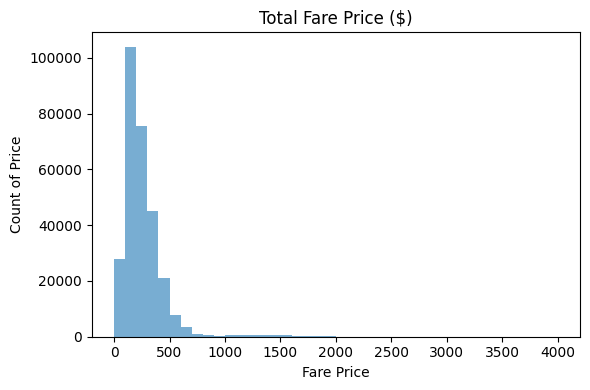

In [58]:
# Histogram and/or box plot of all flight prices
bins = [0, 99.9, 199.9, 299.9, 399.9, 499.9, 599.9, 699.9, 799.9, 899.9, 999.9, 1599.9, 1999.9, 2999.9, 3999.9]
fig, axs = plt.subplots(1, 1, figsize =(6, 4), tight_layout = True)
plt.hist(clean_df['Total Cost'], bins= bins, alpha=0.6)
plt.title('Total Fare Price ($)')
plt.xlabel('Fare Price')
plt.ylabel('Count of Price')
plt.show()

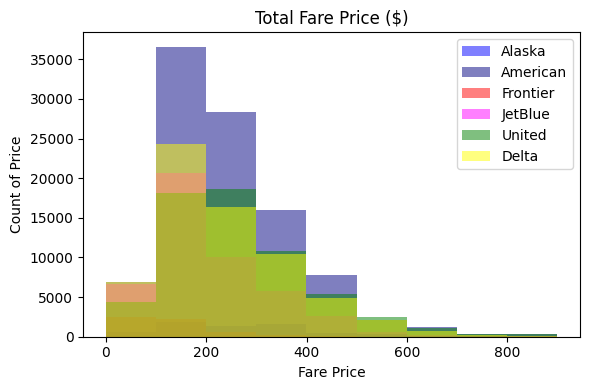

In [71]:
# Histograms of the Fare Price by airline.
alsk = clean_df.loc[clean_df['Airline']=='Alaska Airlines']
aa = clean_df.loc[clean_df['Airline']=='American Airlines']
delt = clean_df.loc[clean_df['Airline']=='Delta']
fro = clean_df.loc[clean_df['Airline']=='Frontier Airlines']
jet = clean_df.loc[clean_df['Airline']=='JetBlue Airways']
uni = clean_df.loc[clean_df['Airline']=='United']
bins = [0, 99.9, 199.9, 299.9, 399.9, 499.9, 599.9, 699.9, 799.9, 899.9]#, 999.9, 1599.9, 1999.9, 2999.9, 3999.9]
fig, axs = plt.subplots(1, 1, figsize =(6, 4), tight_layout = True)
plt.hist(alsk['Total Cost'], bins= bins, alpha=0.5, color='blue', label='Alaska')
plt.hist(aa['Total Cost'], bins= bins, alpha=0.5, color='navy', label='American')
plt.hist(fro['Total Cost'], bins= bins, alpha=0.5, color='red', label='Frontier')
plt.hist(jet['Total Cost'], bins= bins, alpha=0.5, color='magenta', label='JetBlue')
plt.hist(uni['Total Cost'], bins= bins, alpha=0.5, color='green', label='United')
plt.hist(delt['Total Cost'], bins= bins, alpha=0.5, color='yellow', label='Delta')
plt.title('Total Fare Price ($)')
plt.legend(loc='upper right')
plt.xlabel('Fare Price')
plt.ylabel('Count of Price')
plt.show()

In [ ]:
# Parallel box plots comparing flight prices comparing flight prices at different times of day (categorize morning, afternoon, night)

In [ ]:
# Perform a regression analysis on flight price and any of the quantitative variables:
# Should include: scatter plot, regression equation & r-squared value

In [ ]:
# Compare flight price to flight duration (time)

In [ ]:
# Compare flight price to travel distance

In [ ]:
# Compare flight price to exact time of day